In [1]:
import numpy as np
import matplotlib.pyplot as plt

Antes que nada unas definiciones. Si un seno es de la forma $\sin(2\pi ft)$ decimos que tiene frecuencia $\omega=2\pi f$. Dada una señal $f(n\Delta)$ evaluada en un sampleo con separación $\Delta$ definimos la función reconstrucción
$$
f(t)=\sum_{n=-\infty}^{\infty} f(n\Delta)\text{sinc}(\frac{\omega_m}{\pi}(t-n\Delta)),
$$
siendo $\omega_m$ la máxima frecuencia que tiene la señal. La reconstrucción será exacta si la señal tiene una frecuencia máxima y el espaciado de sampleo $\Delta$ es tal que $\Delta=\frac{\pi}{\omega_m}$ o, lo que es lo mismo,  $\Delta=\frac{1}{2 f_m}$. Si el sampleo no cumple esa propiedad porque tiene pocos puntos, o si $\Delta$ no satisface esta igualdad, la fórmula de reconstrucción no sería exacta. Veamos ejemplos. Primero programemos la fórmula de reconstrucción.

In [ ]:
def reconstruction(x, tsampled, tsmooth, F):
    x_sinc = np.zeros(len(tsmooth))
    for n in range(0, len(tsampled)):
        x_sinc += x[n] * np.sinc(F * (tsmooth-n*tsampled[1]))
    return x_sinc

Como dijimo s esta fórmula deberíamos poner  F*tsampled[1]=1 (tsampled[1]=$\Delta$ ) (está diciendo que la reconstrucción será exacta si F$^{(-1)} = \Delta$ sii $\Delta = \frac{\pi}{\omega_m}$) para que la reconstrucciòn funcione, pero los ponemos como parámetros independientes para jugar un poco. Probemos con una trigonométrica con frecuencia màxima $f=10$, lo que equivale a decir a una frecuencia máxima de $\omega_m=20\pi$.

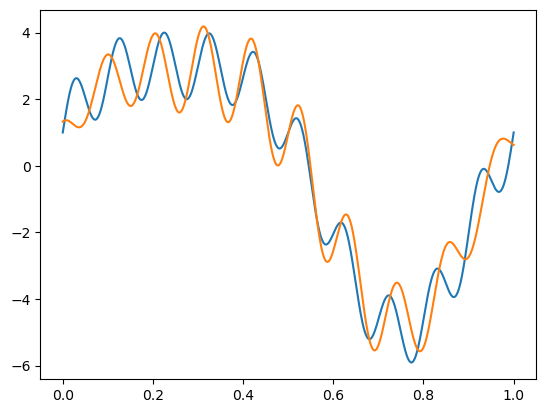

In [ ]:
def y(t, f):
  return np.sin(2*np.pi*f*t)+np.cos(2*np.pi*f*t/5)+4*np.sin(2*np.pi*f*t/10)

#f = fm = 10
#wm = 2*pi*fm = 2*pi*10 = 20pi
#F = wm/pi = 20
#Estamos tomando \Delta = pi/wm = 1/20 que hace que la reconstrucción sea óptima.
f=10
tsampled=np.linspace(0, 1, 20)
tsmooth=np.linspace(0, 1, 800)
ysampled=y(tsampled, f)
ysmooth=y(tsmooth, f)
yreconstruido=reconstruction(ysampled, tsampled, tsmooth, 20)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)



Acá tenemos $f_m=10$ y tomamos $\Delta=1/20$. Da bien, no ideal, dado que la función sinc puede tener algún error. Aumentemos a 25.

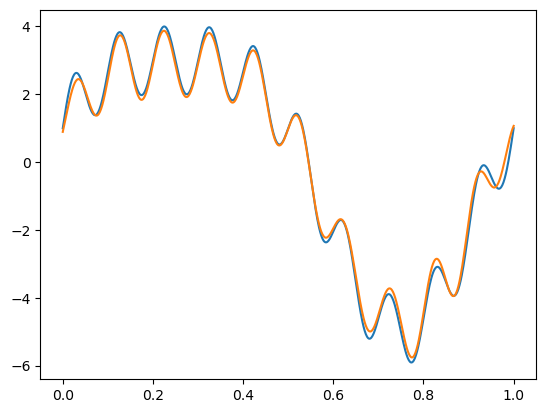

In [ ]:
f=10
tsampled=np.linspace(0, 1, 25) #Esto hace que $\Delta = 1/25$
tsmooth=np.linspace(0, 1, 800)
ysampled=y(tsampled, f)
ysmooth=y(tsmooth, f)
yreconstruido=reconstruction(ysampled, tsampled, tsmooth, 25)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)

Ya superado Nyquist empieza a dar bastante bien la reconstrucciòn. Que sucede si ponemos un espaciado tal que $2 f_m \Delta\neq 1$? (Esto es lo mismo que decir que $\Delta \neq \frac{\pi}{\omega_m}$ )

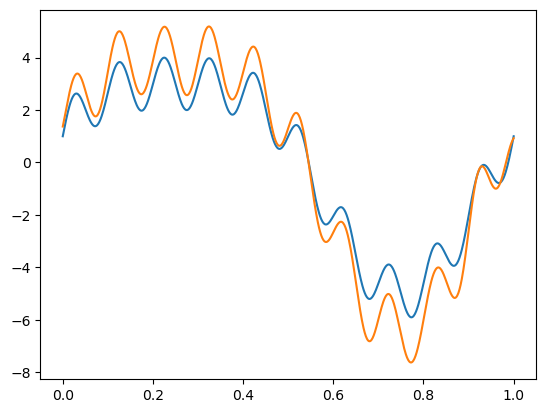

In [ ]:
f=10
tsampled=np.linspace(0, 1, 40)
tsmooth=np.linspace(0, 1, 800)
ysampled=y(f, tsampled)
ysmooth=y(f, tsmooth)
yreconstruido=reconstruction(ysampled, tsampled, tsmooth, 30)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)